<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 5.  Соревнование Kaggle "Catch Me If You Can"

На этой неделе мы вспомним про концепцию стохастического градиентного спуска и опробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали на 4 неделе. Также мы познакомимся с данными [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей и сделаем в нем первые посылки. По итогам этой недели дополнительные баллы получат те, кто попадет в топ-30 публичного лидерборда соревнования.

**В этой части проекта Вам могут быть полезны видеозаписи следующих лекций курса "Обучение на размеченных данных":**
   - [Стохатический градиентный спуск](https://www.coursera.org/learn/supervised-learning/lecture/xRY50/stokhastichieskii-ghradiientnyi-spusk)
   - [Линейные модели. Sklearn.linear_model. Классификация](https://www.coursera.org/learn/supervised-learning/lecture/EBg9t/linieinyie-modieli-sklearn-linear-model-klassifikatsiia)
   
**Также рекомендуется вернуться и просмотреть [задание](https://www.coursera.org/learn/supervised-learning/programming/t2Idc/linieinaia-rieghriessiia-i-stokhastichieskii-ghradiientnyi-spusk) "Линейная регрессия и стохастический градиентный спуск" 1 недели 2 курса специализации.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите тетрадку в соответствующем Peer Review. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/1pLsegkAICL9PzOLyAeH9DmDOBfktte0l8JW75uWcTng). 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

**Считаем данные [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки).**

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'w5data'

In [3]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

In [4]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


**Объединим обучающую и тестовую выборки – это понадобится, чтоб вместе потом привести их к разреженному формату.**

In [5]:
train_test_df = pd.concat([train_df, test_df])

В обучающей выборке видим следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   site1   253561 non-null  int64  
 1   time1   253561 non-null  object 
 2   site2   250098 non-null  float64
 3   time2   250098 non-null  object 
 4   site3   246919 non-null  float64
 5   time3   246919 non-null  object 
 6   site4   244321 non-null  float64
 7   time4   244321 non-null  object 
 8   site5   241829 non-null  float64
 9   time5   241829 non-null  object 
 10  site6   239495 non-null  float64
 11  time6   239495 non-null  object 
 12  site7   237297 non-null  float64
 13  time7   237297 non-null  object 
 14  site8   235224 non-null  float64
 15  time8   235224 non-null  object 
 16  site9   233084 non-null  float64
 17  time9   233084 non-null  object 
 18  site10  231052 non-null  float64
 19  time10  231052 non-null  object 
 20  target  253561 non-null  int64  
dtypes: float64

In [7]:
test_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,2014-11-04 10:03:21,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,2014-05-16 15:05:40,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   site1   82797 non-null  int64  
 1   time1   82797 non-null  object 
 2   site2   81308 non-null  float64
 3   time2   81308 non-null  object 
 4   site3   80075 non-null  float64
 5   time3   80075 non-null  object 
 6   site4   79182 non-null  float64
 7   time4   79182 non-null  object 
 8   site5   78341 non-null  float64
 9   time5   78341 non-null  object 
 10  site6   77566 non-null  float64
 11  time6   77566 non-null  object 
 12  site7   76840 non-null  float64
 13  time7   76840 non-null  object 
 14  site8   76151 non-null  float64
 15  time8   76151 non-null  object 
 16  site9   75484 non-null  float64
 17  time9   75484 non-null  object 
 18  site10  74806 non-null  float64
 19  time10  74806 non-null  object 
dtypes: float64(9), int64(1), object(10)
memory usage: 13.3+ MB


**В обучающей выборке – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.**

In [9]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

**Пока для прогноза будем использовать только индексы посещенных сайтов. Индексы нумеровались с 1, так что заменим пропуски на нули.**

In [10]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')

In [11]:
train_test_df_sites.head(10)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768
4,782,782,782,782,782,782,782,782,782,782
5,22,177,175,178,177,178,175,177,177,178
6,570,21,570,21,21,0,0,0,0,0
7,803,23,5956,17513,37,21,803,17514,17514,17514
8,22,21,29,5041,14422,23,21,5041,14421,14421
9,668,940,942,941,941,942,940,23,21,22


**Создайте разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как мы это делали ранее. Используйте объединенную матрицу *train_test_df_sites*, потом разделите обратно на обучающую и тестовую части.**

Обратите внимание на то, что в  сессиях меньше 10 сайтов  у нас остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы надо будет удалить.

**Выделите в отдельный вектор *y* ответы на обучающей выборке.**

In [12]:
from collections import Counter

def make_csr(X):
    row,col,val = [],[],[]
    for i, r in enumerate(np.array(X)):
        for id,freq in Counter(r).items():
            row.append(i)
            col.append(id)
            val.append(freq)
    return csr_matrix((val, (row, col)))[:,1:]

train_test_sparse = make_csr(train_test_df_sites)
X_train_sparse = train_test_sparse[:train_df.shape[0]]
X_test_sparse = train_test_sparse[train_df.shape[0]:]
y = train_df["target"].to_numpy()

**<font color='red'>Вопрос 1. </font> Выведите размерности матриц *X_train_sparse* и *X_test_sparse* – 4 числа на одной строке через пробел: число строк и столбцов матрицы *X_train_sparse*, затем число строк и столбцов матрицы *X_test_sparse*.**

In [13]:
print(*X_train_sparse.shape, *X_test_sparse.shape)

253561 48371 82797 48371


**Сохраним в pickle-файлы объекты *X_train_sparse*, *X_test_sparse* и *y* (последний – в файл *kaggle_data/train_target.pkl*).**

In [14]:
with open(os.path.join(PATH_TO_DATA, 'X_train_sparse.pkl'), 'wb') as X_train_sparse_pkl:
    pickle.dump(X_train_sparse, X_train_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'X_test_sparse.pkl'), 'wb') as X_test_sparse_pkl:
    pickle.dump(X_test_sparse, X_test_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'train_target.pkl'), 'wb') as train_target_pkl:
    pickle.dump(y, train_target_pkl, protocol=2)

**Разобьем обучающую выборку на 2 части в пропорции 7/3, причем не перемешивая. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдем и здесь.**

In [15]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

**Создайте объект `sklearn.linear_model.SGDClassifier` с логистической функцией потерь и параметром *random_state*=17. Остальные параметры оставьте по умолчанию, разве что *n_jobs*=-1 никогда не помешает. Обучите  модель на выборке `(X_train, y_train)`.**

In [16]:
sgd_logit = SGDClassifier(loss="log", random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train)

SGDClassifier(loss='log', n_jobs=-1, random_state=17)

**Сделайте прогноз в виде предсказанных вероятностей того, что это сессия Элис, на отложенной выборке *(X_valid, y_valid)*.**

In [17]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)[:,1]

**<font color='red'>Вопрос 2. </font> Посчитайте ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке. Округлите до 3 знаков после разделителя.**

In [18]:
round(roc_auc_score(y_valid, logit_valid_pred_proba),3)

0.934

**Сделайте прогноз в виде предсказанных вероятностей отнесения к классу 1 для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).**

In [19]:
%%time
sgd_logit.fit(X_train_sparse,y)
logit_test_pred_proba = sgd_logit.predict_proba(X_test_sparse)[:,1]

CPU times: user 841 ms, sys: 410 ms, total: 1.25 s
Wall time: 473 ms


**Запишите ответы в файл и сделайте посылку на Kaggle. Дайте своей команде (из одного человека) на Kaggle говорящее название – по шаблону "[YDF & MIPT] Coursera_Username", чтоб можно было легко идентифицировать Вашу посылку на [лидерборде](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard/public).**

**Результат, который мы только что получили, соответствует бейзлайну "SGDCLassifer" на лидерборде, задача на эту неделю – как минимум его побить.**

In [20]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [21]:
write_to_submission_file(logit_test_pred_proba, os.path.join(PATH_TO_DATA, "submission.csv"))

# Решение

In [22]:
import re, time, datetime

from sklearn.model_selection import cross_val_score, TimeSeriesSplit, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import scipy.sparse as sparse

import tqdm.auto as tqdm

import matplotlib.pylab as plt
import seaborn as sns

## 1. Извлечение признаков

Возьмём признаки, подобранные на третьей неделе. Процесс извлечения признаков оформим в виде функции, получающей на вход исходный датафрейм, словарь, и возвращающую датафрейм с признаками.

Считаем словарь сайтов. Дополнительно, т.к. мы попробуем использовать информацию о TLD посещённых сайтов, заранее подготовим словарь TLD, и отображение ID сайтов в ID TLD.

In [23]:
with open(os.path.join(PATH_TO_DATA, "site_dic.pkl"), "rb") as file:
    site_dict = pickle.load(file)

ipv4 = r"^(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$"
ipv6 = r"^\s*((([0-9A-Fa-f]{1,4}:){7}([0-9A-Fa-f]{1,4}|:))|(([0-9A-Fa-f]{1,4}:){6}(:[0-9A-Fa-f]{1,4}|((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3})|:))|(([0-9A-Fa-f]{1,4}:){5}(((:[0-9A-Fa-f]{1,4}){1,2})|:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3})|:))|(([0-9A-Fa-f]{1,4}:){4}(((:[0-9A-Fa-f]{1,4}){1,3})|((:[0-9A-Fa-f]{1,4})?:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:))|(([0-9A-Fa-f]{1,4}:){3}(((:[0-9A-Fa-f]{1,4}){1,4})|((:[0-9A-Fa-f]{1,4}){0,2}:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:))|(([0-9A-Fa-f]{1,4}:){2}(((:[0-9A-Fa-f]{1,4}){1,5})|((:[0-9A-Fa-f]{1,4}){0,3}:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:))|(([0-9A-Fa-f]{1,4}:){1}(((:[0-9A-Fa-f]{1,4}){1,6})|((:[0-9A-Fa-f]{1,4}){0,4}:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:))|(:(((:[0-9A-Fa-f]{1,4}){1,7})|((:[0-9A-Fa-f]{1,4}){0,5}:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:)))(%.+)?\s*$"
ipre = f"({ipv4})|({ipv6})"

url_to_tld_map = {
    id: "_ip" if re.match(ipre, url) else url.split(".")[-1]
    for url, id in site_dict.items()
}
tld_dict = {
    tld: id for id, tld in enumerate(np.unique(list(url_to_tld_map.values())), 1)
}
url_to_tld_map = {id: tld_dict[tld] for id, tld in url_to_tld_map.items()}
url_to_tld_map[0] = 0

Основная функция извлечения признаков. Т.к. функция получилась длинной (наверно её надо бы оформить в виде отдельного модуля или класса с разбивкой на маленькие функции для извлечения отдельных групп признаков), в теле функции добавлены поясняющие комментарии.

In [24]:
def fe(df_in, site_dict, tld_dict, url_to_tld_map, target=False):

    """
    признаки:
        site### - ID сайтов в сессии
        tld### - ID TLD сайтов

        tdiff### - интервал между соседними запросами 
                    (между первым и вторым, 3 и 2 и т.п)

        tdiff_mean, tdiff_std, tdiff_median, tdiff_mad -
                    соответствующие статистики для tdiff###
                    
        session_duration - продолжительность сессии в секундах

        n_unique_sites - число уникальных сайтов в сессии
        n_unique_tlds - число уникальных TLD в сессии
        n_ips - число запросов ip-адресов в сессии

        start_year - год начала сессии
        start_month - месяц начала сессии
        start_day - день начала сессии
        start_hour - час начала сессии
        start_minute - минуты начала сессии
        start_day_of_week - день недели начала сессии
        start_weekend - 1 если сессия началась в выходные
        start_year_month - комбинация года и месяца
        start_week_hour - комбинация недели и часа (час с начала недели)
        start_hour_minute - комбинация часов и минут (минуты с начала дня)
        start_epoch - время начала сессии в POSIX-формате
        start_morning, start_noon, start_evening - флаги времени суток начала сессии

        automatic - флаг сессии из серии запросов с равными интервалами одного сайта
        final - флаг финальной сессии (есть "нули")
    """

    # извлекаем ID сайтов в сессии
    scols = [c for c in df_in.columns if re.match(r"^site\d+$", c)]
    df_out = df_in[scols].fillna(0).astype(int)

    # извлекаем ID TLD сайтов в сессии
    tldcols = [f"tld{i}" for i in range(1,len(scols)+1)]
    df_out[tldcols] = df_out[scols].applymap(lambda x: url_to_tld_map[x])

    # Временные интервалы между запросами сайтов в сессии
    tcols = [c for c in df_in.columns if re.match(r"^time\d+$", c)]
    timestamps = df_in[tcols].apply(lambda x: pd.to_datetime(x, dayfirst=True))
    temp = timestamps.to_numpy()[:, 1:] - timestamps.to_numpy()[:, :-1]
    tdcols = [f"tdiff{i}" for i in range(1, len(tcols))]
    temp = pd.DataFrame(temp, columns=tdcols, index=timestamps.index)
    temp = temp.astype(np.timedelta64(1, "s"))
    df_out[tdcols] = temp.fillna(0).astype(int)

    # статистики интервалов между запросами сайтов в сессии
    temp = df_out[tdcols]
    df_out[f"tdiff_mean"] = temp.mean(axis=1)
    df_out[f"tdiff_median"] = temp.median(axis=1)
    df_out[f"tdiff_std"] = temp.std(axis=1)
    df_out[f"tdiff_mad"] = temp.apply(
        lambda x: abs(x - df_out[f"tdiff_median"])
    ).median(axis=1)

    # статистики интервалов между запросами сайтов в сессии
    temp = df_out[tdcols][df_out[tdcols] <= 705]
    df_out[f"tdiff_short_mean"] = temp.mean(axis=1)
    df_out[f"tdiff_short_median"] = temp.median(axis=1)
    df_out[f"tdiff_short_std"] = temp.std(axis=1)
    df_out[f"tdiff_short_mad"] = temp.apply(
        lambda x: abs(x - df_out[f"tdiff_short_median"])
    ).median(axis=1)

    # число уникальных сайтов, TLD в сессии
    df_out["n_unique_sites"] = df_in[scols].apply(
        lambda row: len(set([x for x in row if not np.isnan(x)])), axis=1
    )
    df_out["n_unique_tlds"] = df_out[tldcols].sum(axis=1)

    # число обращений по IP в сессии
    ipv4 = r"^(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$"
    ipv6 = r"^\s*((([0-9A-Fa-f]{1,4}:){7}([0-9A-Fa-f]{1,4}|:))|(([0-9A-Fa-f]{1,4}:){6}(:[0-9A-Fa-f]{1,4}|((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3})|:))|(([0-9A-Fa-f]{1,4}:){5}(((:[0-9A-Fa-f]{1,4}){1,2})|:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3})|:))|(([0-9A-Fa-f]{1,4}:){4}(((:[0-9A-Fa-f]{1,4}){1,3})|((:[0-9A-Fa-f]{1,4})?:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:))|(([0-9A-Fa-f]{1,4}:){3}(((:[0-9A-Fa-f]{1,4}){1,4})|((:[0-9A-Fa-f]{1,4}){0,2}:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:))|(([0-9A-Fa-f]{1,4}:){2}(((:[0-9A-Fa-f]{1,4}){1,5})|((:[0-9A-Fa-f]{1,4}){0,3}:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:))|(([0-9A-Fa-f]{1,4}:){1}(((:[0-9A-Fa-f]{1,4}){1,6})|((:[0-9A-Fa-f]{1,4}){0,4}:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:))|(:(((:[0-9A-Fa-f]{1,4}){1,7})|((:[0-9A-Fa-f]{1,4}){0,5}:((25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)(\.(25[0-5]|2[0-4]\d|1\d\d|[1-9]?\d)){3}))|:)))(%.+)?\s*$"
    ipre = f"({ipv4})|({ipv6})"
    ip_ids = [id for url, id in site_dict.items() if re.match(ipre, url)]
    df_out["n_ips"] = df_in[scols].isin(ip_ids).sum(axis=1)

    # признаки извлекаемые из даты и времени начала сессии
    df_out["start_date"] = timestamps["time1"]
    df_out["start_year"] = timestamps["time1"].dt.year
    df_out["start_month"] = timestamps["time1"].dt.month
    df_out["start_day"] = timestamps["time1"].dt.day
    df_out["start_hour"] = timestamps["time1"].dt.hour
    df_out["start_minute"] = timestamps["time1"].dt.minute

    df_out["start_day_of_week"] = timestamps["time1"].apply(lambda x: x.weekday())
    df_out["start_weekend"] = (df_out["start_day_of_week"] >= 5).astype("int")

    df_out["start_year_month"] = df_out["start_year"] * 100 + df_out["start_month"]
    df_out["start_week_hour"] = df_out["start_day_of_week"] * 24 + df_out["start_hour"]
    df_out["start_hour_minute"] = df_out["start_hour"] * 60 + df_out["start_minute"]
    df_out["start_epoch"] = timestamps["time1"].astype("int64") // 1e9

    # флаги времени суток начала сессии
    df_out[f"start_morning"] = (
        (df_out["start_hour"] >= 6) & (df_out["start_hour"] <= 11)
    ).astype("int")
    df_out[f"start_noon"] = (
        (df_out["start_hour"] >= 12) & (df_out["start_hour"] <= 17)
    ).astype("int")
    df_out[f"start_evening"] = (
        (df_out["start_hour"] >= 18) & (df_out["start_hour"] <= 23)
    ).astype("int")

    # продолжительность сессии
    df_out["session_duration"] = (
        (timestamps.max(axis=1) - timestamps.min(axis=1))
        .apply(lambda x: x.total_seconds())
        .astype(int)
    )

    # флаг сессии из серии запросов с равными интервалами одного сайта
    df_out["automatic"] = (
        (df_out["tdiff_std"] == 0)
        & (df_out["n_unique_sites"] == 1)
        & ((df_out[tdcols] > 0).all(axis=1))
    ).astype(int)
    
    # флаг финальной сессии (есть "нули")
    df_out["final"] = (df_out[scols] == 0).any(axis=1).astype('int')

    if target:
        df_out["target"] = df_in["target"]
    return df_out


Теперь сгенерируем признаки. Объекты в выборке (сессии) зависимы друг от друга в хронологическом порядке. Что бы учесть эту особенность данных, обучать модель будем на также упорядоченной хронологически выборке.

In [25]:
time_cols = [c for c in train_df.columns if re.match(r"^time\d+$", c)]

temp = train_df.copy()
temp[time_cols] = temp[time_cols].astype("datetime64")
temp = temp.sort_values("time1")

fe_train = fe(temp, site_dict, tld_dict, url_to_tld_map )
y = temp["target"].astype(int).values

In [26]:
fe_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 21669 to 204762
Data columns (total 58 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site1               253561 non-null  int64         
 1   site2               253561 non-null  int64         
 2   site3               253561 non-null  int64         
 3   site4               253561 non-null  int64         
 4   site5               253561 non-null  int64         
 5   site6               253561 non-null  int64         
 6   site7               253561 non-null  int64         
 7   site8               253561 non-null  int64         
 8   site9               253561 non-null  int64         
 9   site10              253561 non-null  int64         
 10  tld1                253561 non-null  int64         
 11  tld2                253561 non-null  int64         
 12  tld3                253561 non-null  int64         
 13  tld4                25356

Тестовую выборку упорядочивать не будем, т.к. в этом случае грейдер не сможет сопоставить ответы.

In [27]:
fe_test = fe(test_df, site_dict, tld_dict, url_to_tld_map )

Дополнительно, сгенерируем признаки независимо для двух частей тренировочной выборки и проверим, что они совпадут с признаками по всей выборке. Это будет свидетельствовать что нет утечки статистики при генерации признаков (т.е. каждый признак сгенерирован только на основе других признаков того же объекта и не использует информацию других объектов в выборке). Обучающую выборку для определённости разобьём аналогично выбранному ранее разбиению (на 2 части в пропорции 7/3, не перемешивая).

In [28]:
fe_check_train = fe(temp.iloc[:train_share], site_dict, tld_dict, url_to_tld_map )
fe_check_valid = fe(temp.iloc[train_share:], site_dict, tld_dict, url_to_tld_map )
assert (pd.concat((fe_check_train,fe_check_valid)) == fe_train).all().all(), "Вероятно утечка статистики"

Наконец соберём некоторые наборы признаков:

In [29]:
site_cols = [c for c in fe_train.columns if re.match(r"^site\d+$", c)]
tld_cols = [c for c in fe_train.columns if re.match(r"^tld\d+$", c)]
tdiff_cols = [c for c in fe_train.columns if re.match(r"^tdiff\d+$", c)]
start_cols = [c for c in fe_train.columns if re.match(r"^start_.*$", c)]

## 2. Подбор алгоритма для обучения

Выберем несколько базовых алгоритмов и оценим их производительность при помощи кроссвалидации. Т.к. данные упорядочены хронологически, будем использовать генератор разбиений TimeSeriesSplit с числом фолдов 10.

In [30]:
ts = TimeSeriesSplit(10)

Дополнительно обучим классификатор как на "мешке слов" из сайтов, так и на Tf-idf сайтов.

In [31]:
sites_train_str = fe_train[site_cols].apply(lambda x: ' '.join([str(i) for i in x]), axis=1)
sites_test_str = fe_test[site_cols].apply(lambda x: ' '.join([str(i) for i in x]), axis=1)

X_sites_bow_train = CountVectorizer(ngram_range=(1, 2), max_features=100000).fit_transform(sites_train_str)
X_sites_tfidf_train = TfidfTransformer().fit_transform(X_sites_bow_train)

In [32]:
%%time

def print_cv_scores(cvs, prefix=""):
    print(f"{prefix}CV: {cvs.mean():.5f} ± {cvs.std():5f}")
    s = ", ".join([f"{d:.5f}" for d in cvs])
    print(f"{prefix}CV scores: [{s}]")


ft_sets = { "BoW" : X_sites_bow_train, "Tf-Idf" : X_sites_tfidf_train }
estimators = [ LogisticRegression(solver="liblinear"),
               LogisticRegression(solver="lbfgs"),
               SGDClassifier(loss="log", n_jobs=-1),]

cvs = []
for label, X in ft_sets.items():
    for est in estimators:
        print(f"\n{label}, {est}:")
        start = time.time()
        cv_scores = cross_val_score(est, X, y, cv=ts, scoring='roc_auc', n_jobs=-1)
        cvs.append(cv_scores)
        duration = datetime.timedelta(seconds = time.time() - start)
        print(f"\tВыполнено за: {str(duration).split('.')[0]}.")
        print_cv_scores(cv_scores, "\t")
    
print()


BoW, LogisticRegression(solver='liblinear'):
	Выполнено за: 0:00:17.
	CV: 0.86881 ± 0.082738
	CV scores: [0.82951, 0.65221, 0.87652, 0.95772, 0.84160, 0.88559, 0.93750, 0.86070, 0.93512, 0.91160]

BoW, LogisticRegression():
	Выполнено за: 0:00:13.
	CV: 0.87016 ± 0.080206
	CV scores: [0.84068, 0.65908, 0.87599, 0.95670, 0.83939, 0.88365, 0.93527, 0.86360, 0.93494, 0.91232]

BoW, SGDClassifier(loss='log', n_jobs=-1):
	Выполнено за: 0:00:01.
	CV: 0.86124 ± 0.091940
	CV scores: [0.76885, 0.63112, 0.87637, 0.96027, 0.85946, 0.90002, 0.93793, 0.85568, 0.92804, 0.89469]

Tf-Idf, LogisticRegression(solver='liblinear'):
	Выполнено за: 0:00:03.
	CV: 0.86462 ± 0.078730
	CV scores: [0.80414, 0.66101, 0.86998, 0.93611, 0.84363, 0.88819, 0.92339, 0.87053, 0.92959, 0.91959]

Tf-Idf, LogisticRegression():
	Выполнено за: 0:00:10.
	CV: 0.86521 ± 0.078067
	CV scores: [0.81092, 0.66154, 0.86981, 0.93599, 0.84313, 0.88801, 0.92331, 0.87039, 0.92944, 0.91952]

Tf-Idf, SGDClassifier(loss='log', n_jobs=-1):


Для дальнейшего поиска оптимальной модели будем использовать векторизацию Tf-Idf с логистической регрессией с оптимизирующим методом liblinear (так как он существенно быстрее, а снижение ROC AUC мало)

Так же видно, что первые два фолда по всем прогонам сильно отличаются от остальных. Так как мы генерируем фолды по схеме TimeSeriesSplit с 10 фолдами, первые для фолда содержат следующее количество тренировочных объектов:

In [33]:
print(fe_train.shape[0]//11, fe_train.shape[0]//11*2)

23051 46102


Предположим, что, т.к. количество признаков в bow/tf-idf велико (~50к и более), первые два фолда содержат недообученные модели.

Если мы отбросим эти два первых фолда, то дисперсия оставшихся восьми фолдов сократится и оценка среднего станет более стабильной:

In [34]:
pd.DataFrame(
    np.array([cv[i:].std() for cv in cvs for i in range(10)]).reshape(6, 10),
    columns=[f"drop_{i}" for i in range(10)],
    index=[f"est_{i}" for i in range(len(cvs))],
).T

,est_0,est_1,est_2,est_3,est_4,est_5
drop_0,0.082738,0.080206,0.091940,0.078730,0.078067,0.082261
drop_1,0.086114,0.083908,0.091315,0.080222,0.080049,0.081190
drop_2,0.038430,0.038200,0.035415,0.031922,0.032016,0.031220
drop_3,0.039896,0.039645,0.036466,0.032246,0.032354,0.031018
drop_4,0.036073,0.035880,0.030995,0.031324,0.031443,0.031393
drop_5,0.029464,0.028394,0.028859,0.022887,0.022907,0.011738
drop_6,0.030881,0.029195,0.032214,0.023510,0.023523,0.012261
drop_7,0.031060,0.029766,0.029572,0.025810,0.025821,0.011809
drop_8,0.011761,0.011313,0.016672,0.005001,0.004964,0.013159
drop_9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Мы остановились на логистической регрессии. Так как у нас основной массив признаков - это tf-idf вектора, т.е. разреженная матрица признаков эквивалентных по значимости, остановимся на L2-регуляризации. Т.о. необходимо для данного набора признаков подобрать оптимальное значение гиперпараметра C. Будем делать это кросс-валидацией. Дополнительно реализуем итеративный поиск оптимального значения: на очередной (следующей) итерации будем искать оптимум в окресности найденного на текущей итерации оптимального C. Реализация далее:

In [35]:
def lrcv(lr, rng, cv, X, y, tol=1e-4, max_iter=5, skip_first=2):

    """
    lr - регрессор
    rng - границы и шаг для сетки поиска
    cv - генератор индексов для кроссвалидации
    X,y - обучающая выборка и целевая переменная
    tol - криетрий остановки поиска
    max_iter - максимальное количество итераций
    skip_first - сколько первых фолдов пропустить при оценке оптимального значения параметра
    """

    with tqdm.tqdm(total=max_iter) as progress_bar:
        for i in range(max_iter):

            pg = {"C": np.linspace(*rng)}
            if pg["C"][0] == 0:
                pg["C"] = pg["C"][1:]
            gscv = GridSearchCV(lr,param_grid=pg, cv=cv,scoring="roc_auc",n_jobs=-1,refit=False,return_train_score=True).fit(X, y)

            cvr = pd.DataFrame(gscv.cv_results_).fillna(0)
            splits_cols = [c for c in cvr.columns if re.match(r"^split\d+_test_score$", c)]

            cvr["mean_test_score"] = cvr[splits_cols].iloc[:, skip_first:].mean(axis=1)
            cvr["std_test_score"] = cvr[splits_cols].iloc[:, skip_first:].std(axis=1)
            top = cvr["mean_test_score"].idxmax()

            if top > 0 and top < len(pg["C"]) - 1:
                diff = cvr["mean_test_score"][top + 1] - cvr["mean_test_score"][top - 1]
                if diff < tol:
                    progress_bar.total = i + 1
                    progress_bar.update(1)
                    break
            
            new_l = cvr["param_C"][top - 1] if top > 0 else cvr["param_C"][top] / len(pg["C"])
            new_u = cvr["param_C"][top + 1] if top < len(pg["C"]) - 1 else cvr["param_C"][top] * len(pg["C"])
            rng = (new_l, new_u, len(pg["C"]))
            progress_bar.update(1)
        else:
            print(
                f"Достигнуто максимальное количество итераций ({max_iter}). Вероятно оптимальное значение не найдено"
            )

    cvr["skipped"] = skip_first
    splits_cols = [c for c in cvr.columns if re.match(r"^split\d+_((test)|(train))_score$", c)]
    return cvr.loc[top, splits_cols+["mean_test_score","std_test_score","params","skipped"]]

Функция возвращает ROC AUC для фолдов кроссвалидации для лучшего параметра на последней итерации. Эти результаты мы будем сохранять в словарь, где ключ - описание модели, а значение - результат этой функции для этой модели.

Создадим так же функцию преобразования этого словаря в датафрейм.

In [36]:
def cvrs_to_df(cvrs):
    df_out = pd.DataFrame(cvrs).T
    colname_map = {c:c.replace("_test_score","").replace("_train_score","_tr")  for c in df_out.columns}
    return df_out.rename(colname_map, axis=1)

In [37]:
cvrs = {}
cvrs_cols = [f"split{i}" for i in range(10)] + ["mean","std"]
spl = [f"split{i}" for i in range(10)]

Теперь создадим функцию обёртку, которая собирает обучающую выборку на основании переданных имён признаков и обучает модель

In [38]:
def cvtest_model(
    X,
    ft_df=fe_train,
    y=y,
    ft_asis=None,
    ft_scale=None,
    ft_dummy=None,
    solver="liblinear",
    start_range=(0, 10, 11),
    skip_first=2,
):
    """
    ft_asis - признаки не требующие обработки
    ft_scale - признаки которые надо нормализовать
    ft_dummy - признаки которые надо закодировать OHE
    """

    X_ = X.copy()

    if ft_asis is not None:
        X_ = sparse.hstack((X_, ft_df[ft_asis])).tocsr()

    if ft_scale is not None:
        ft_scale = StandardScaler().fit_transform(ft_df[ft_scale])
        X_ = sparse.hstack((X_, ft_scale)).tocsr()

    if ft_dummy is not None:
        ft_dummy = pd.get_dummies(ft_df[ft_dummy], columns=ft_dummy, drop_first=True)
        X_ = sparse.hstack((X_, ft_dummy)).tocsr()

    return lrcv(LogisticRegression(max_iter=1e5, solver=solver), start_range, ts, X_, y, skip_first)

Сгенерируем Tf-idf вектора для разных n-грамм и лимитов на количество признаков. Это будут наши первые бэйзлайны.

In [39]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=50000)
X_sites_train_1_50k = vectorizer.fit_transform(sites_train_str)
X_sites_test_1_50k = vectorizer.transform(sites_test_str)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)
X_sites_train_2_50k = vectorizer.fit_transform(sites_train_str)
X_sites_test_2_50k = vectorizer.transform(sites_test_str)

vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=50000)
X_sites_train_3_50k = vectorizer.fit_transform(sites_train_str)
X_sites_test_3_50k = vectorizer.transform(sites_test_str)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
X_sites_train_2_100k = vectorizer.fit_transform(sites_train_str)
X_sites_test_2_100k = vectorizer.transform(sites_test_str)

vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=100000)
X_sites_train_3_100k = vectorizer.fit_transform(sites_train_str)
X_sites_test_3_100k = vectorizer.transform(sites_test_str)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=150000)
X_sites_train_2_150k = vectorizer.fit_transform(sites_train_str)
X_sites_test_2_150k = vectorizer.transform(sites_test_str)

vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=150000)
X_sites_train_3_150k = vectorizer.fit_transform(sites_train_str)
X_sites_test_3_150k = vectorizer.transform(sites_test_str)

In [40]:
names = { 
    "1-50": X_sites_train_1_50k,
    "2-50": X_sites_train_2_50k,
    "3-50": X_sites_train_3_50k,
    "2-100": X_sites_train_2_100k,
    "3-100": X_sites_train_3_100k,
    "2-150": X_sites_train_2_150k,
    "3-150": X_sites_train_3_150k,
}

for n,x in names.items():
    print(n)
    cvrs[n] = cvtest_model(x)

1-50



2-50



3-50



2-100



3-100



2-150



3-150


In [41]:
cvrsdf = cvrs_to_df(cvrs).loc[:,cvrs_cols].sort_values("mean",ascending=False)
idx = [ i for i in cvrsdf.index if re.match(r"^\d-\d+$",i)]
cvrsdf.loc[idx]

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,mean,std
2-50,0.836048,0.663178,0.886595,0.943245,0.85262,0.886484,0.940134,0.866193,0.937375,0.920955,0.9042,0.035709
3-150,0.833816,0.662733,0.885387,0.943345,0.853322,0.887229,0.940728,0.8704,0.933446,0.919387,0.904155,0.034487
2-100,0.838024,0.664447,0.882809,0.943045,0.853327,0.886591,0.941099,0.867037,0.937877,0.920804,0.904074,0.0358906
3-50,0.839623,0.66036,0.883565,0.94031,0.853747,0.886663,0.939052,0.870371,0.93321,0.923106,0.903753,0.0340989
3-100,0.834024,0.662068,0.885183,0.942609,0.852341,0.886981,0.939663,0.869739,0.933601,0.919008,0.903641,0.0345358
2-150,0.838091,0.664338,0.881394,0.940596,0.853459,0.885812,0.939845,0.866,0.938376,0.921187,0.903334,0.0357328
1-50,0.833595,0.673409,0.876492,0.940991,0.850685,0.882226,0.934295,0.86176,0.931622,0.9185,0.899571,0.035777


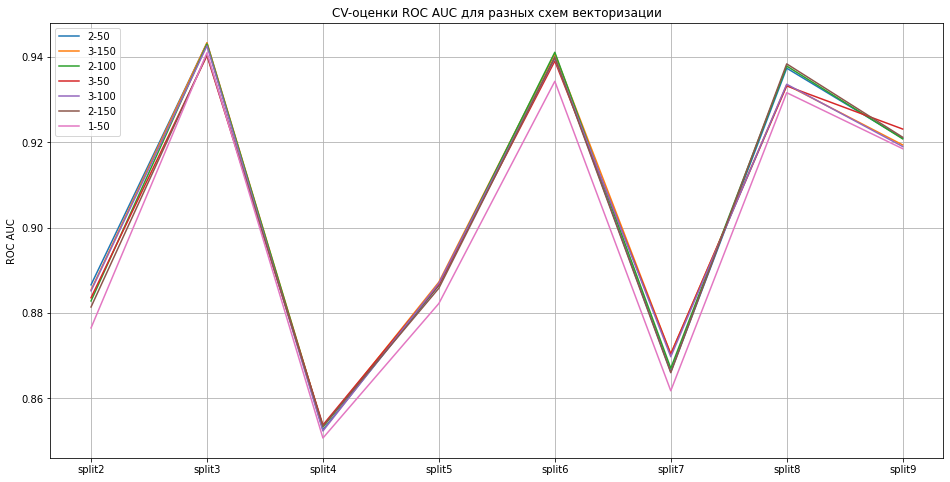

In [42]:
plt.figure(figsize=(16,8))
for model, cv in zip(idx,cvrsdf.loc[idx,spl].values):
    plt.plot(spl[2:], cv[2:], label=model)
plt.ylabel("ROC AUC")
plt.title("CV-оценки ROC AUC для разных схем векторизации")
plt.legend()
plt.grid()

Исходя из сравнения все варианты очень похожи. Остановимся на схеме 3-50, т.к. эта на этой схеме мы достигли сходимости быстрее, а разница в ROC-AUC незначительна.

In [43]:
base_name = "3-50"
base_X = X_sites_train_3_50k

## 3. Изучим влияние признаков начала сессии

In [44]:
[c for c in fe_train.columns if re.match(r"^start_.*$",c)]

['start_date',
 'start_year',
 'start_month',
 'start_day',
 'start_hour',
 'start_minute',
 'start_day_of_week',
 'start_weekend',
 'start_year_month',
 'start_week_hour',
 'start_hour_minute',
 'start_epoch',
 'start_morning',
 'start_noon',
 'start_evening']

In [45]:
%%time

ft = {
    "yr": ["start_year"],
    "mnth": ["start_month"],
    "day": ["start_day"],
    "hr": ["start_hour"],
    "min": ["start_minute"],
    "dow": ["start_day_of_week"],
    "yr_mnth":["start_year_month"],
    "wk_hr":["start_week_hour"],
    "hr_min":["start_hour_minute"],
    "e":["start_epoch"],
}

for n, f in ft.items():
    print(f"{base_name},t,{n}")
    cvrs[f"{base_name},t,{n}"] = cvtest_model(base_X, ft_scale=f)

ft = {
    "we": ["start_weekend"],
    "tod":["start_morning","start_noon","start_evening"],
}

for n, f in ft.items():
    print(f"{base_name},t,{n}")
    cvrs[f"{base_name},t,{n}"] = cvtest_model(base_X, ft_asis=f)

3-50,t,yr



3-50,t,mnth



3-50,t,day



3-50,t,hr



3-50,t,min



3-50,t,dow



3-50,t,yr_mnth



3-50,t,wk_hr



3-50,t,hr_min



3-50,t,e



3-50,t,we



3-50,t,tod



CPU times: user 11 s, sys: 1.56 s, total: 12.6 s
Wall time: 12min 5s


In [46]:
cvrsdf = cvrs_to_df(cvrs).loc[:,cvrs_cols].sort_values("mean",ascending=False)
idx = [ i for i in cvrsdf.index if re.match(r"^3-50(,t,.*)?$",i)]
cvrsdf.loc[idx]

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,mean,std
"3-50,t,tod",0.87556,0.792877,0.924455,0.962441,0.909513,0.948239,0.954507,0.933578,0.95417,0.94822,0.94189,0.0178648
"3-50,t,hr_min",0.813577,0.707826,0.939223,0.954863,0.873305,0.953229,0.945564,0.917246,0.966457,0.960597,0.93881,0.0304874
"3-50,t,hr",0.812649,0.70679,0.938818,0.956521,0.874844,0.951307,0.942822,0.918092,0.965182,0.960545,0.938516,0.0296984
"3-50,t,dow",0.766177,0.656601,0.88146,0.941257,0.854236,0.897682,0.930433,0.890138,0.945969,0.945667,0.910855,0.0346925
"3-50,t,wk_hr",0.782905,0.658288,0.883199,0.940239,0.852707,0.889829,0.935295,0.880607,0.94317,0.940967,0.908252,0.0355781
"3-50,t,yr",0.839973,0.660413,0.909991,0.943115,0.854543,0.888932,0.942206,0.870789,0.932445,0.922188,0.908026,0.0334063
"3-50,t,yr_mnth",0.836468,0.662215,0.90973,0.943151,0.854471,0.889016,0.942408,0.870731,0.932145,0.922254,0.907988,0.0334309
"3-50,t,e",0.826563,0.662384,0.884011,0.940543,0.853483,0.887503,0.94079,0.869595,0.932592,0.924035,0.904069,0.0344657
3-50,0.839623,0.66036,0.883565,0.94031,0.853747,0.886663,0.939052,0.870371,0.93321,0.923106,0.903753,0.0340989
"3-50,t,day",0.745711,0.628757,0.885447,0.941617,0.853149,0.886753,0.93393,0.866783,0.93358,0.925197,0.903307,0.0343175


Наиболее интересные признаки - это признаки "часть дня" (высокое среднее ROC AUC, снижение дисперсии оценок по фолдам), "минуты дня" и "час дня", "день недели".

Признаки "минута часа", "месяц", "день месяца" и признак "weekend"-а дают плохие результаты.

Сконцентрируемся на первой группе признаков. Они отражают график работы пользователя в течении дня и по сути содержат схожую информацию. Попробуем рассмотреть "час дня" и "day of week" как категориальный признак, а так же сравнить их сочетания.

In [47]:
%%time

ft = {
    "hrd": ["start_hour"],
    "dowd": ["start_day_of_week"],
}
for n, f in ft.items():
    print(f"{base_name},t,{n}")
    cvrs[f"{base_name},t,{n}"] = cvtest_model(base_X, ft_dummy=f)

ft_scale = ["start_day_of_week"]
ft_asis = ["start_morning","start_noon","start_evening"]
print(f"{base_name},t,tod+dow")
cvrs[f"{base_name},t,tod+dow"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale)

ft_scale = ["start_hour"]
ft_asis = ["start_morning","start_noon","start_evening"]
print(f"{base_name},t,tod+hr")
cvrs[f"{base_name},t,tod+hr"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale)

ft_scale = ["start_hour_minute"]
ft_asis = ["start_morning","start_noon","start_evening"]
print(f"{base_name},t,tod+hr_minute")
cvrs[f"{base_name},t,tod+hr_minute"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale)

ft_scale = ["start_hour", "start_day_of_week"]
ft_asis = ["start_morning","start_noon","start_evening"]
print(f"{base_name},t,tod+hr+dow")
cvrs[f"{base_name},t,tod+hr+dow"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale)

ft_scale = ["start_hour_minute", "start_day_of_week"]
ft_asis = ["start_morning","start_noon","start_evening"]
print(f"{base_name},t,tod+hr_min+dow")
cvrs[f"{base_name},t,tod+hr_min+dow"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale)

3-50,t,hrd



3-50,t,dowd



3-50,t,tod+dow



3-50,t,tod+hr



3-50,t,tod+hr_minute



3-50,t,tod+hr+dow



3-50,t,tod+hr_min+dow



CPU times: user 7.57 s, sys: 1.14 s, total: 8.71 s
Wall time: 10min 36s


In [48]:
cvrsdf = cvrs_to_df(cvrs).loc[:,cvrs_cols].sort_values("mean",ascending=False)
idx = [ i for i in cvrsdf.index if re.match(r"^3-50(,t,.*)?$",i)]
cvrsdf.loc[idx]

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,mean,std
"3-50,t,hrd",0.657985,0.827491,0.97021,0.958372,0.9327,0.971425,0.936394,0.952335,0.97272,0.967777,0.957742,0.0159471
"3-50,t,tod+dow",0.851903,0.784984,0.923131,0.962704,0.909272,0.951622,0.950916,0.9409,0.962598,0.962776,0.94549,0.0199556
"3-50,t,tod+hr+dow",0.69828,0.739557,0.94492,0.953461,0.863767,0.959489,0.953371,0.936926,0.966559,0.970509,0.943625,0.03405
"3-50,t,tod+hr_min+dow",0.701995,0.740432,0.944577,0.950814,0.860733,0.960628,0.954503,0.936698,0.967237,0.970491,0.94321,0.035167
"3-50,t,tod+hr",0.711395,0.747161,0.944969,0.954326,0.865872,0.959245,0.953471,0.93411,0.961109,0.962836,0.941992,0.0321753
"3-50,t,tod",0.87556,0.792877,0.924455,0.962441,0.909513,0.948239,0.954507,0.933578,0.95417,0.94822,0.94189,0.0178648
"3-50,t,tod+hr_minute",0.717076,0.748344,0.944673,0.951522,0.862749,0.960224,0.95474,0.933598,0.961758,0.962621,0.941486,0.0332889
"3-50,t,hr_min",0.813577,0.707826,0.939223,0.954863,0.873305,0.953229,0.945564,0.917246,0.966457,0.960597,0.93881,0.0304874
"3-50,t,hr",0.812649,0.70679,0.938818,0.956521,0.874844,0.951307,0.942822,0.918092,0.965182,0.960545,0.938516,0.0296984
"3-50,t,dow",0.766177,0.656601,0.88146,0.941257,0.854236,0.897682,0.930433,0.890138,0.945969,0.945667,0.910855,0.0346925


Кодирование признака "start_hour" методом OHE, вместо использования этого признака как вещественного, дал существенный прирост в метрике. Рассмотрим сочетания признаков для hrd.

In [49]:
%%time

ft_dummy = ["start_hour"]
ft_asis = ["start_morning","start_noon","start_evening"]
print(f"{base_name},t,tod+hrd")
cvrs[f"{base_name},t,tod+hrd"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale, ft_dummy=ft_dummy, start_range=(10,20,11))

ft_dummy = ["start_hour"]
ft_scale = ["start_minute"]
ft_asis = ["start_morning","start_noon","start_evening"]
print(f"{base_name},t,tod+hrd+min")
cvrs[f"{base_name},t,tod+hrd+min"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale, ft_dummy=ft_dummy, start_range=(10,20,11))

ft_dummy = ["start_hour"]
ft_scale = ["start_day_of_week"]
ft_asis = ["start_morning","start_noon","start_evening"]
print(f"{base_name},t,tod+hrd+dow")
cvrs[f"{base_name},t,tod+hrd+dow"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale, ft_dummy=ft_dummy, start_range=(10,20,11))

ft_dummy = ["start_hour"]
ft_scale = ["start_minute", "start_day_of_week"]
ft_asis = ["start_morning","start_noon","start_evening"]
print(f"{base_name},t,tod+hrd+min+dow")
cvrs[f"{base_name},t,tod+hrd+min+dow"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale, ft_dummy=ft_dummy, start_range=(10,20,11))

ft_dummy = ["start_hour"]
ft_scale = ["start_minute"]
print(f"{base_name},t,hrd+min")
cvrs[f"{base_name},t,hrd+min"] = cvtest_model(base_X, ft_scale=ft_scale, ft_dummy=ft_dummy, start_range=(10,20,11))

ft_dummy = ["start_hour"]
ft_scale = ["start_day_of_week"]
print(f"{base_name},t,hrd+dow")
cvrs[f"{base_name},t,hrd+dow"] = cvtest_model(base_X, ft_asis=ft_asis, ft_scale=ft_scale, ft_dummy=ft_dummy, start_range=(10,20,11))

ft_dummy = ["start_hour"]
ft_scale = ["start_minute", "start_day_of_week"]
print(f"{base_name},t,hrd+min+dow")
cvrs[f"{base_name},t,hrd+min+dow"] = cvtest_model(base_X, ft_scale=ft_scale, ft_dummy=ft_dummy, start_range=(10,20,11))

3-50,t,tod+hrd



3-50,t,tod+hrd+min



3-50,t,tod+hrd+dow



3-50,t,tod+hrd+min+dow



3-50,t,hrd+min



3-50,t,hrd+dow



3-50,t,hrd+min+dow



CPU times: user 8.32 s, sys: 1.19 s, total: 9.52 s
Wall time: 16min 24s


In [50]:
cvrsdf = cvrs_to_df(cvrs).loc[:,cvrs_cols].sort_values("mean",ascending=False)
idx = [ i for i in cvrsdf.index if re.match(r"^3-50(,t,.*)?$",i)]
cvrsdf.loc[idx]

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,mean,std
"3-50,t,tod+hrd",0.645578,0.825359,0.970616,0.957939,0.932725,0.973363,0.933736,0.953334,0.975059,0.974141,0.958864,0.0176882
"3-50,t,tod+hrd+min+dow",0.648373,0.823983,0.970676,0.957692,0.932374,0.973294,0.934503,0.953111,0.97531,0.97393,0.958861,0.0176264
"3-50,t,hrd+min+dow",0.643118,0.821476,0.970481,0.957017,0.931983,0.972624,0.936072,0.952478,0.975231,0.973151,0.95863,0.0172467
"3-50,t,hrd+dow",0.646637,0.827737,0.970234,0.95871,0.933116,0.971547,0.934846,0.952838,0.973476,0.972942,0.958463,0.0168043
"3-50,t,tod+hrd+dow",0.646637,0.827737,0.970234,0.95871,0.933116,0.971547,0.934846,0.952838,0.973476,0.972942,0.958463,0.0168043
"3-50,t,tod+hrd+min",0.663267,0.825142,0.970752,0.958137,0.932077,0.973252,0.936091,0.952404,0.974617,0.968768,0.958262,0.0167761
"3-50,t,hrd+min",0.658814,0.823106,0.970621,0.95736,0.931854,0.972793,0.936799,0.95204,0.974512,0.968343,0.95804,0.0165909
"3-50,t,hrd",0.657985,0.827491,0.97021,0.958372,0.9327,0.971425,0.936394,0.952335,0.97272,0.967777,0.957742,0.0159471
"3-50,t,tod+dow",0.851903,0.784984,0.923131,0.962704,0.909272,0.951622,0.950916,0.9409,0.962598,0.962776,0.94549,0.0199556
"3-50,t,tod+hr+dow",0.69828,0.739557,0.94492,0.953461,0.863767,0.959489,0.953371,0.936926,0.966559,0.970509,0.943625,0.03405


Отобразим на графике ROC-AUC по фолдам:

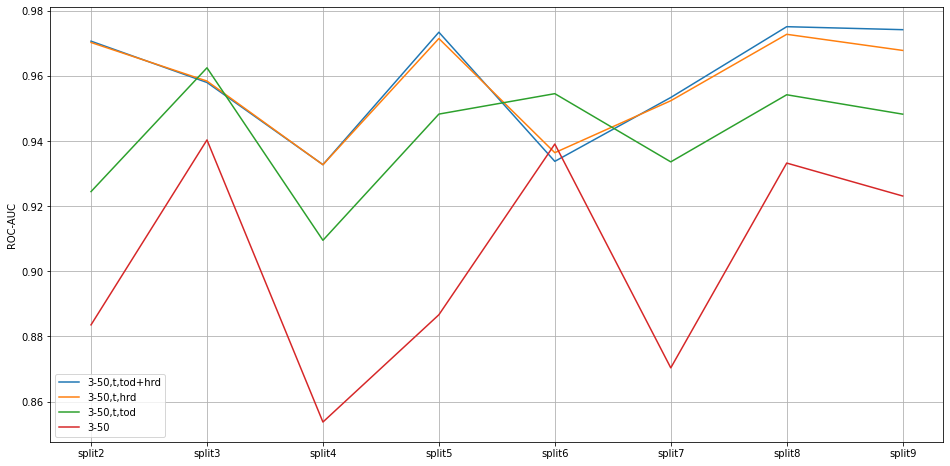

In [51]:
models = [
    "3-50,t,tod+hrd",
    "3-50,t,hrd",
#    "3-50,t,tod+hrd+min+dow",
#    "3-50,t,hrd+min+dow",
#     "3-50,t,hrd+dow",
#     "3-50,t,tod+hrd+dow",
#     "3-50,t,tod+hrd+min",
#     "3-50,t,hrd+min",
#     "3-50,t,tod+hr",
#     "3-50,t,hr",
#    "3-50,t,dow",
    "3-50,t,tod",
    "3-50",
#     "3-50,t,dowd",
]

plt.figure(figsize=(16, 8))
for model in models:
    plt.plot(spl[2:], cvrsdf.loc[model, spl[2:]].values, label=model)
plt.legend()
plt.ylabel("ROC-AUC")
plt.grid()

Остановимся на связке tod и hdr.

## 4. Изучим влияние интервальных признаков

In [52]:
[c for c in fe_train.columns if re.match(r"^tdiff.*$",c)] + ["session_duration"]

['tdiff1',
 'tdiff2',
 'tdiff3',
 'tdiff4',
 'tdiff5',
 'tdiff6',
 'tdiff7',
 'tdiff8',
 'tdiff9',
 'tdiff_mean',
 'tdiff_median',
 'tdiff_std',
 'tdiff_mad',
 'tdiff_short_mean',
 'tdiff_short_median',
 'tdiff_short_std',
 'tdiff_short_mad',
 'session_duration']

In [53]:
%%time

ft_scale = tdiff_cols
print(f"{base_name},i,tds")
cvrs[f"{base_name},i,tds"] = cvtest_model(base_X, ft_scale=ft_scale)

ft = {
    "td_mean": ["tdiff_mean"],
    "td_medain": ["tdiff_median"],
    "td_meanstd": ["tdiff_mean","tdiff_std"],
    "td_medainmad": ["tdiff_median","tdiff_mad"],
    "td_allstats": ["tdiff_mean","tdiff_std","tdiff_median","tdiff_mad"],
    "sd": ["session_duration"],
    "td_short_meanstd": ["tdiff_short_mean","tdiff_short_std"],
}

for n, f in ft.items():
    print(f"{base_name},i,{n}")
    cvrs[f"{base_name},i,{n}"] = cvtest_model(base_X, ft_scale=f)

3-50,i,tds



3-50,i,td_mean



3-50,i,td_medain



3-50,i,td_meanstd



3-50,i,td_medainmad



3-50,i,td_allstats



3-50,i,sd



3-50,i,td_short_meanstd



CPU times: user 7.6 s, sys: 1.19 s, total: 8.79 s
Wall time: 15min 30s


In [54]:
cvrsdf = cvrs_to_df(cvrs).loc[:,cvrs_cols].sort_values("mean",ascending=False)
idx = [ i for i in cvrsdf.index if re.match(r"^3-50(,i,.*)?$",i)]
cvrsdf.loc[idx]

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,mean,std
"3-50,i,td_meanstd",0.831975,0.663852,0.884409,0.941592,0.855368,0.888896,0.939589,0.871799,0.934558,0.923775,0.904998,0.0338284
"3-50,i,td_mean",0.831292,0.663936,0.88425,0.94144,0.855303,0.888899,0.939569,0.871814,0.934556,0.92386,0.904961,0.0338338
"3-50,i,sd",0.831292,0.663936,0.884256,0.94144,0.855303,0.888899,0.939569,0.871809,0.934556,0.923858,0.904961,0.0338338
"3-50,i,td_allstats",0.831431,0.66199,0.884281,0.941372,0.855283,0.888828,0.939393,0.871689,0.934656,0.923734,0.904904,0.033824
"3-50,i,td_short_meanstd",0.827448,0.662755,0.883306,0.941212,0.855464,0.888933,0.939576,0.87176,0.934585,0.923805,0.90483,0.0338548
"3-50,i,td_medain",0.837909,0.661291,0.88453,0.940806,0.854192,0.887547,0.939777,0.870554,0.934198,0.922824,0.904303,0.0341205
"3-50,i,td_medainmad",0.838046,0.65881,0.884009,0.940834,0.854404,0.887408,0.939838,0.870632,0.934191,0.922773,0.904261,0.0341272
"3-50,i,tds",0.825475,0.663753,0.876545,0.942093,0.854372,0.88939,0.93982,0.872229,0.934952,0.923626,0.904128,0.0348811
3-50,0.839623,0.66036,0.883565,0.94031,0.853747,0.886663,0.939052,0.870371,0.93321,0.923106,0.903753,0.0340989


In [55]:
%%time

ft = {
    "td+sd": ["tdiff_mean","tdiff_std","session_duration"],
    "tds+sd": tdiff_cols + ["session_duration"],
    "tds+td": tdiff_cols + ["tdiff_mean","tdiff_std"],
    "tds+td+sd": tdiff_cols + ["tdiff_mean","tdiff_std","session_duration"],
}

for n, f in ft.items():
    print(f"{base_name},i,{n}")
    cvrs[f"{base_name},i,{n}"] = cvtest_model(base_X, ft_scale=f)

3-50,i,td+sd



3-50,i,tds+sd



3-50,i,tds+td



3-50,i,tds+td+sd



CPU times: user 4.14 s, sys: 688 ms, total: 4.83 s
Wall time: 23min 1s


In [56]:
cvrsdf = cvrs_to_df(cvrs).loc[:,cvrs_cols].sort_values("mean",ascending=False)
idx = [ i for i in cvrsdf.index if re.match(r"^3-50(,i,.*)?$",i)]
cvrsdf.loc[idx]

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,mean,std
"3-50,i,td+sd",0.831872,0.663854,0.884417,0.941611,0.855383,0.888891,0.939581,0.871804,0.934554,0.923777,0.905002,0.0338255
"3-50,i,td_meanstd",0.831975,0.663852,0.884409,0.941592,0.855368,0.888896,0.939589,0.871799,0.934558,0.923775,0.904998,0.0338284
"3-50,i,td_mean",0.831292,0.663936,0.88425,0.94144,0.855303,0.888899,0.939569,0.871814,0.934556,0.92386,0.904961,0.0338338
"3-50,i,sd",0.831292,0.663936,0.884256,0.94144,0.855303,0.888899,0.939569,0.871809,0.934556,0.923858,0.904961,0.0338338
"3-50,i,td_allstats",0.831431,0.66199,0.884281,0.941372,0.855283,0.888828,0.939393,0.871689,0.934656,0.923734,0.904904,0.033824
"3-50,i,td_short_meanstd",0.827448,0.662755,0.883306,0.941212,0.855464,0.888933,0.939576,0.87176,0.934585,0.923805,0.90483,0.0338548
"3-50,i,td_medain",0.837909,0.661291,0.88453,0.940806,0.854192,0.887547,0.939777,0.870554,0.934198,0.922824,0.904303,0.0341205
"3-50,i,td_medainmad",0.838046,0.65881,0.884009,0.940834,0.854404,0.887408,0.939838,0.870632,0.934191,0.922773,0.904261,0.0341272
"3-50,i,tds",0.825475,0.663753,0.876545,0.942093,0.854372,0.88939,0.93982,0.872229,0.934952,0.923626,0.904128,0.0348811
"3-50,i,tds+sd",0.825265,0.663743,0.876537,0.942093,0.854382,0.889391,0.939817,0.872226,0.934952,0.923626,0.904128,0.0348799


Использование этих признаков не сильно улучшает качество модели. Остановимся на признаках "tdiff_meanstd+sd" и "tdiff_meanstd".

## 5. Изучим влияние прочих признаков

In [57]:
%%time

ft = {
    "nus": ["n_unique_sites"],
    "nut": ["n_unique_tlds"],
    "nip": ["n_ips"],
}

for n, f in ft.items():
    print(f"{base_name},m,{n}")
    cvrs[f"{base_name},m,{n}"] = cvtest_model(base_X, ft_scale=f)

ft = {
    "auto": ["automatic"],
    "final": ["final"],
}

for n, f in ft.items():
    print(f"{base_name},m,{n}")
    cvrs[f"{base_name},m,{n}"] = cvtest_model(base_X, ft_asis=f)

3-50,m,nus



3-50,m,nut



3-50,m,nip



3-50,m,auto



3-50,m,final



CPU times: user 4.54 s, sys: 679 ms, total: 5.22 s
Wall time: 4min 51s


In [58]:
cvrsdf = cvrs_to_df(cvrs).loc[:,cvrs_cols].sort_values("mean",ascending=False)
idx = [ i for i in cvrsdf.index if re.match(r"^3-50(,m,.*)?$",i)]
cvrsdf.loc[idx]

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,mean,std
"3-50,m,auto",0.838418,0.660592,0.883783,0.940379,0.85387,0.886784,0.939089,0.870489,0.933743,0.923218,0.903919,0.034121
"3-50,m,nus",0.831809,0.661867,0.883495,0.941038,0.853848,0.884671,0.942607,0.869265,0.932728,0.922625,0.903785,0.0349487
3-50,0.839623,0.66036,0.883565,0.94031,0.853747,0.886663,0.939052,0.870371,0.93321,0.923106,0.903753,0.0340989
"3-50,m,nip",0.840194,0.66217,0.883668,0.939841,0.853784,0.886002,0.938686,0.87012,0.932881,0.921677,0.903332,0.0338854
"3-50,m,nut",0.831944,0.6636,0.880352,0.940018,0.853644,0.889635,0.933682,0.869692,0.93396,0.923738,0.90309,0.0336734
"3-50,m,final",0.842638,0.668378,0.882551,0.937561,0.853524,0.885484,0.925097,0.870188,0.930458,0.924961,0.901228,0.031945


In [59]:
%%time

print(f"{base_name},m,nus+auto")
cvrs[f"{base_name},m,nus+auto"] = cvtest_model(base_X, ft_asis=["automatic"], ft_scale=["n_unique_sites"])

3-50,m,nus+auto



CPU times: user 970 ms, sys: 150 ms, total: 1.12 s
Wall time: 1min


In [60]:
cvrsdf = cvrs_to_df(cvrs).loc[:,cvrs_cols].sort_values("mean",ascending=False)
idx = [ i for i in cvrsdf.index if re.match(r"^3-50(,m,.*)?$",i)]
cvrsdf.loc[idx]

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,mean,std
"3-50,m,nus+auto",0.831298,0.661946,0.883702,0.941153,0.854041,0.884847,0.942774,0.869443,0.933189,0.922801,0.903994,0.0349656
"3-50,m,auto",0.838418,0.660592,0.883783,0.940379,0.85387,0.886784,0.939089,0.870489,0.933743,0.923218,0.903919,0.034121
"3-50,m,nus",0.831809,0.661867,0.883495,0.941038,0.853848,0.884671,0.942607,0.869265,0.932728,0.922625,0.903785,0.0349487
3-50,0.839623,0.66036,0.883565,0.94031,0.853747,0.886663,0.939052,0.870371,0.93321,0.923106,0.903753,0.0340989
"3-50,m,nip",0.840194,0.66217,0.883668,0.939841,0.853784,0.886002,0.938686,0.87012,0.932881,0.921677,0.903332,0.0338854
"3-50,m,nut",0.831944,0.6636,0.880352,0.940018,0.853644,0.889635,0.933682,0.869692,0.93396,0.923738,0.90309,0.0336734
"3-50,m,final",0.842638,0.668378,0.882551,0.937561,0.853524,0.885484,0.925097,0.870188,0.930458,0.924961,0.901228,0.031945


Вновь, используемые признаки не дают существенного прироста качества классификации. Остановимся на "nus+auto"

## 6. Подберём итоговый набор признаков

In [61]:
tod = ["start_morning","start_noon","start_evening"]
hrd = ["start_hour"]

td = ["tdiff_mean","tdiff_std"]
sd = ["session_duration"]

auto = ["automatic"]
nus = ["n_unique_sites"]

In [62]:
%%time

print(f"{base_name},f,tod+hrd+td")
cvrs[f"{base_name},f,tod+hrd+td"] = cvtest_model(base_X, ft_asis=tod, ft_scale=td, ft_dummy=hrd, start_range=(10,20,11))
print(f"{base_name},f,tod+hrd+sd")
cvrs[f"{base_name},f,tod+hrd+sd"] = cvtest_model(base_X, ft_asis=tod, ft_scale=sd, ft_dummy=hrd, start_range=(10,20,11))
print(f"{base_name},f,tod+hrd+td+sd")
cvrs[f"{base_name},f,tod+hrd+td+sd"] = cvtest_model(base_X, ft_asis=tod, ft_scale=td+sd, ft_dummy=hrd, start_range=(10,20,11))

print(f"{base_name},f,tod+hrd+td+auto+nus")
cvrs[f"{base_name},f,tod+hrd+td+auto+nus"] = cvtest_model(base_X, ft_asis=tod+auto, ft_scale=td+nus, ft_dummy=hrd, start_range=(10,20,11))
print(f"{base_name},f,tod+hrd+sd+auto+nus")
cvrs[f"{base_name},f,tod+hrd+sd+auto+nus"] = cvtest_model(base_X, ft_asis=tod+auto, ft_scale=sd+nus, ft_dummy=hrd, start_range=(10,20,11))
print(f"{base_name},f,tod+hrd+td+sd+auto+nus")
cvrs[f"{base_name},f,tod+hrd+td+sd+auto+nus"] = cvtest_model(base_X, ft_asis=tod+auto, ft_scale=td+sd+nus, ft_dummy=hrd, start_range=(10,20,11))

3-50,f,tod+hrd+td



3-50,f,tod+hrd+sd



3-50,f,tod+hrd+td+sd



3-50,f,tod+hrd+td+auto+nus



3-50,f,tod+hrd+sd+auto+nus



3-50,f,tod+hrd+td+sd+auto+nus



CPU times: user 7.35 s, sys: 1.08 s, total: 8.44 s
Wall time: 15min 11s


In [63]:
cvrsdf = cvrs_to_df(cvrs).loc[:,cvrs_cols].sort_values("mean",ascending=False)
idx = [ i for i in cvrsdf.index if re.match(r"^3-50(,f,.*)?$",i)]
cvrsdf.loc[idx]

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9,mean,std
"3-50,f,tod+hrd+td+sd+auto+nus",0.662685,0.830887,0.970328,0.960464,0.933485,0.971982,0.938242,0.953358,0.973437,0.968724,0.958753,0.0156535
"3-50,f,tod+hrd+td+auto+nus",0.662738,0.830829,0.970334,0.960455,0.933485,0.97198,0.938249,0.953355,0.973432,0.968725,0.958752,0.0156521
"3-50,f,tod+hrd+sd+auto+nus",0.663186,0.830794,0.970165,0.960054,0.9335,0.972066,0.937699,0.953437,0.973453,0.968913,0.958661,0.0157557
"3-50,f,tod+hrd+td",0.66549,0.830587,0.970292,0.959945,0.933582,0.97261,0.935741,0.95337,0.973249,0.968845,0.958454,0.0161687
"3-50,f,tod+hrd+td+sd",0.665338,0.830543,0.970287,0.960045,0.933503,0.972437,0.936259,0.953213,0.973222,0.968634,0.95845,0.0160466
"3-50,f,tod+hrd+sd",0.665565,0.830431,0.97012,0.959728,0.933438,0.972388,0.936251,0.953186,0.973202,0.968678,0.958374,0.0160373
3-50,0.839623,0.66036,0.883565,0.94031,0.853747,0.886663,0.939052,0.870371,0.93321,0.923106,0.903753,0.0340989


Посмотрим на ROC-AUC по фолдам

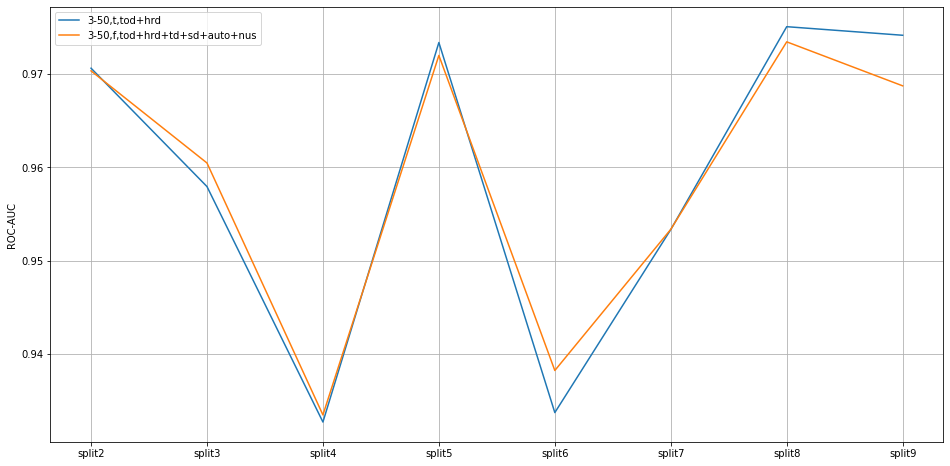

In [64]:
models = [
    "3-50,t,tod+hrd",
#    "3-50,f,tod+hrd+td+sd+nus",
    "3-50,f,tod+hrd+td+sd+auto+nus",
#    '3-50,tod+hrd+min+dow',
#     '3-50,hrd+min+dow',
#     '3-50,hrd+dow',
#     '3-50,tod+hrd+dow',
#     '3-50,tod+hrd+min',
#     '3-50,hrd+min',
#    '3-50,hrd',
#    '3-50'    
]

plt.figure(figsize=(16, 8))
for model in models:
    plt.plot(spl[2:], cvrsdf.loc[model, spl[2:]].values, label=model)
plt.legend()
plt.ylabel("ROC-AUC")
plt.grid()

Видно, что два набора показывают хороший результат: "tod+hrd" дают большее среднее, а "tod+hrd+td+sd+auto+nus" в целом лучше по большему количеству фолдов. Запостим оба результата и посмотрим на разницу.

## 7. Итоговое обучение и постинг рещультатов

In [65]:
X_train = sparse.hstack((X_sites_train_3_50k, fe_train[tod])).tocsr()
X_test = sparse.hstack((X_sites_test_3_50k, fe_test[tod])).tocsr()

X_train = sparse.hstack((X_train, pd.get_dummies(fe_train[hrd],columns=hrd, drop_first=True))).tocsr()
X_test = sparse.hstack((X_test, pd.get_dummies(fe_test[hrd],columns=hrd, drop_first=True))).tocsr()

logreg = LogisticRegression(max_iter=1e5, n_jobs=-1).set_params( **cvrs["3-50,t,tod+hrd"]["params"] )
logreg.fit(X_train, y)

LogisticRegression(C=12.0, max_iter=100000.0, n_jobs=-1)

Посмотрим на коэффициенты регрессии для дополнительных признаков:

In [66]:
ft_names = tod + list(pd.get_dummies(fe_train[hrd],columns=hrd, drop_first=True).columns)
for ft, coef in zip(ft_names,logreg.coef_[0][-len(ft_names):]):
    print(f"{ft:<20} : {coef:>9.6f}")

start_morning        : -2.102714
start_noon           :  2.176519
start_evening        : -0.193537
start_hour_8         : -2.127341
start_hour_9         :  2.506417
start_hour_10        : -2.688524
start_hour_11        :  0.286802
start_hour_12        :  1.016875
start_hour_13        :  0.776480
start_hour_14        : -3.632531
start_hour_15        : -1.086744
start_hour_16        :  2.667484
start_hour_17        :  2.434955
start_hour_18        :  4.961205
start_hour_19        : -1.084956
start_hour_20        : -0.896456
start_hour_21        : -1.223675
start_hour_22        : -1.140175
start_hour_23        : -0.809480


In [67]:
print(f"Минимальное значение коэффициентов: {logreg.coef_[0].min():.4f}")
print()
print(f".01 квантиль: {np.quantile(logreg.coef_[0], .01):.4f}")
print(f".05 квантиль: {np.quantile(logreg.coef_[0], .05):.4f}")
print(f".50 квантиль: {np.quantile(logreg.coef_[0], .50):.4f}")
print(f".95 квантиль: {np.quantile(logreg.coef_[0], .95):.4f}")
print(f".99 квантиль: {np.quantile(logreg.coef_[0], .99):.4f}")
print()
print(f"максимальное значение коэффициентов: {logreg.coef_[0].max():.4f}")
print()
print(f"Cреднее коффициентов с ско: {logreg.coef_[0].mean():.4f} ± {logreg.coef_[0].std():.4f}")

Минимальное значение коэффициентов: -13.2645

.01 квантиль: -1.5868
.05 квантиль: -0.6634
.50 квантиль: -0.0241
.95 квантиль: 1.0126
.99 квантиль: 2.8480

максимальное значение коэффициентов: 13.7815

Cреднее коффициентов с ско: -0.0045 ± 0.6709


	CV: 0.91637 ± 0.091847
	CV scores: [0.66909, 0.83055, 0.97040, 0.95884, 0.93344, 0.97278, 0.93289, 0.95352, 0.97294, 0.96925]


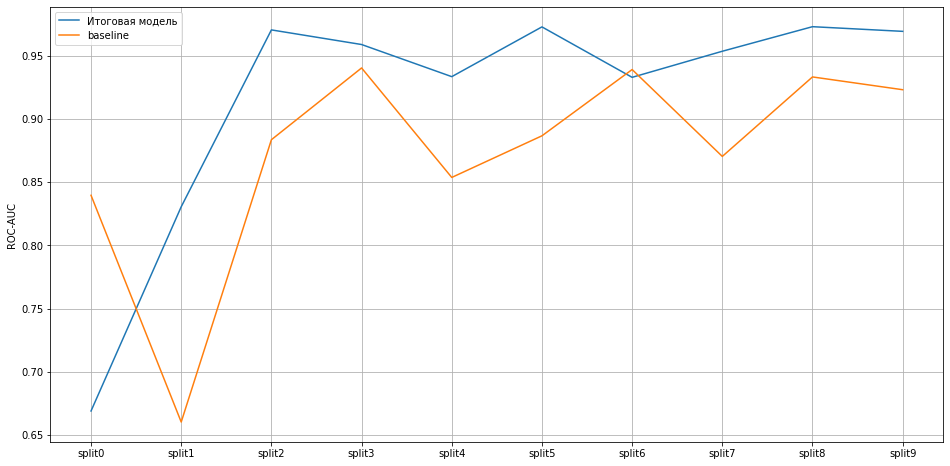

In [68]:
cv_scores = cross_val_score(logreg, X_train, y, cv=ts, scoring='roc_auc', n_jobs=-1)
print_cv_scores(cv_scores, "\t")
plt.figure(figsize=(16,8))
plt.plot(spl, cv_scores, label="Итоговая модель")
plt.plot(spl, cvrsdf.loc["3-50", spl].values, label="baseline")
plt.ylabel("ROC-AUC")
plt.legend()
plt.grid()
plt.show()

In [69]:
write_to_submission_file(logreg.predict_proba(X_test)[:,1], os.path.join(PATH_TO_DATA, "submission_tod_hrd.csv"))

На тестовой выборке с этими признаками полчена оценка ROC-AUC равная 0.94466. Бэнчмарк "Logit +3 features" (.92784) побит.

Теперь обучим модель для набора признаков "tod+hrd+td+sd+auto+nus"

In [70]:
X_train = sparse.hstack((X_sites_train_3_50k, fe_train[tod+auto])).tocsr()
X_test = sparse.hstack((X_sites_test_3_50k, fe_test[tod+auto])).tocsr()

ss = StandardScaler().fit(fe_train[td+sd+nus])
X_train = sparse.hstack((X_train, ss.transform(fe_train[td+sd+nus]))).tocsr()
X_test = sparse.hstack((X_test, ss.transform(fe_test[td+sd+nus]))).tocsr()

X_train = sparse.hstack((X_train, pd.get_dummies(fe_train[hrd],columns=hrd, drop_first=True))).tocsr()
X_test = sparse.hstack((X_test, pd.get_dummies(fe_test[hrd],columns=hrd, drop_first=True))).tocsr()

logreg = LogisticRegression(max_iter=1e5, n_jobs=-1).set_params( **cvrs["3-50,f,tod+hrd+td+sd+auto+nus"]["params"] )
logreg.fit(X_train, y)

LogisticRegression(C=18.0, max_iter=100000.0, n_jobs=-1)

In [71]:
ft_names = tod+auto+ td+sd+nus + list(pd.get_dummies(fe_train[hrd],columns=hrd, drop_first=True).columns)
for ft, coef in zip(ft_names,logreg.coef_[0][-len(ft_names):]):
    print(f"{ft:<20} : {coef:>9.6f}")

start_morning        : -2.197451
start_noon           :  2.288526
start_evening        : -0.296753
automatic            : -1.061432
tdiff_mean           : -0.166330
tdiff_std            :  0.120881
session_duration     : -0.166330
n_unique_sites       : -0.173901
start_hour_8         : -2.277307
start_hour_9         :  2.616508
start_hour_10        : -2.885915
start_hour_11        :  0.441767
start_hour_12        :  1.036129
start_hour_13        :  0.815296
start_hour_14        : -3.773463
start_hour_15        : -1.146510
start_hour_16        :  2.807722
start_hour_17        :  2.549352
start_hour_18        :  5.289254
start_hour_19        : -1.143795
start_hour_20        : -1.061283
start_hour_21        : -1.290203
start_hour_22        : -1.245999
start_hour_23        : -0.844728


In [72]:
print(f"Минимальное значение коэффициентов: {logreg.coef_[0].min():.4f}")
print()
print(f".01 квантиль: {np.quantile(logreg.coef_[0], .01):.4f}")
print(f".05 квантиль: {np.quantile(logreg.coef_[0], .05):.4f}")
print(f".50 квантиль: {np.quantile(logreg.coef_[0], .50):.4f}")
print(f".95 квантиль: {np.quantile(logreg.coef_[0], .95):.4f}")
print(f".99 квантиль: {np.quantile(logreg.coef_[0], .99):.4f}")
print()
print(f"максимальное значение коэффициентов: {logreg.coef_[0].max():.4f}")
print()
print(f"Cреднее коффициентов с ско: {logreg.coef_[0].mean():.4f} ± {logreg.coef_[0].std():.4f}")

Минимальное значение коэффициентов: -14.8127

.01 квантиль: -1.9095
.05 квантиль: -0.8152
.50 квантиль: -0.0234
.95 квантиль: 1.2149
.99 квантиль: 3.4346

максимальное значение коэффициентов: 15.4278

Cреднее коффициентов с ско: -0.0023 ± 0.7944


	CV: 0.91712 ± 0.091897
	CV scores: [0.66898, 0.83183, 0.97030, 0.96067, 0.93348, 0.97198, 0.93834, 0.95338, 0.97344, 0.96874]


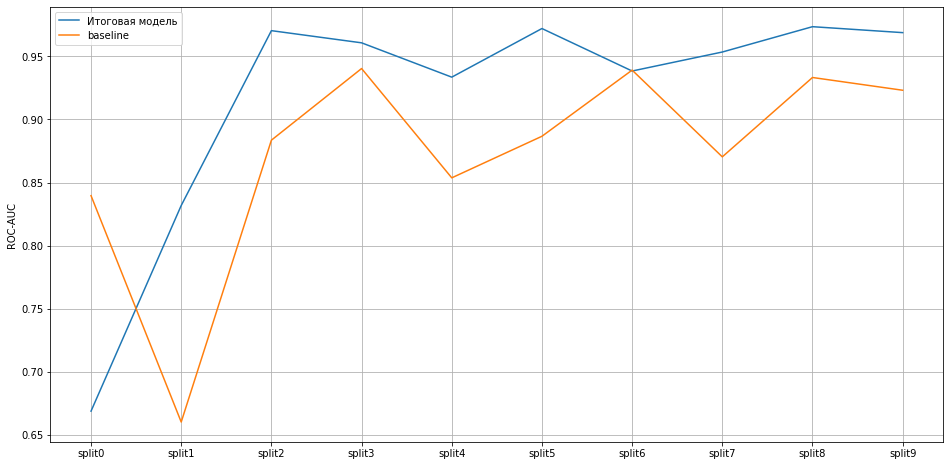

In [73]:
cv_scores = cross_val_score(logreg, X_train, y, cv=ts, scoring='roc_auc', n_jobs=-1)
print_cv_scores(cv_scores, "\t")
plt.figure(figsize=(16,8))
plt.plot(spl, cv_scores, label="Итоговая модель")
plt.plot(spl, cvrsdf.loc["3-50", spl].values, label="baseline")
plt.ylabel("ROC-AUC")
plt.legend()
plt.grid()
plt.show()

In [74]:
write_to_submission_file(logreg.predict_proba(X_test)[:,1], os.path.join(PATH_TO_DATA, "submission_tod_hrd_td_sd_auto_nus.csv"))

На тестовой выборке с этими признаками полчена оценка ROC-AUC равная 0.94406. Бэнчмарк "Logit +3 features" (.92784) побит.

## Критерии оценки работы (только для Peer Review в специализации):
- Правильные ли получились размерности матриц в п. 1? (max. 2 балла)
- Правильным ли получилось значения ROC AUC в п. 2? (max. 4 балла)
- Побит ли бенчмарк "sgd_logit_benchmark.csv" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)
- Побит ли бенчмарк "Logit +3 features" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)

## Пути улучшения
На этой неделе дается много времени на соревнование. Не забывайте вносить хорошие идеи, к которым Вы пришли по ходу соревнования, в описание финального проекта (`html`, `pdf` или `ipynb`). Это только в случае, если вы проходите специализацию.
Что можно попробовать:
 - Использовать ранее построенные признаки для улучшения модели (проверить их можно на меньшей выборке по 150 пользователям, отделив одного из пользователей от остальных – это быстрее)
 - Настроить параметры моделей (например, коэффициенты регуляризации)
 - Если позволяют мощности (или хватает терпения), можно попробовать смешивание (блендинг) ответов бустинга и линейной модели. [Вот](http://mlwave.com/kaggle-ensembling-guide/) один из самых известных тьюториалов по смешиванию ответов алгоритмов, также хороша [статья](https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending) Александра Дьяконова
 - Обратите внимание, что в соревновании также даны исходные данные о посещенных веб-страницах Элис и остальными 1557 пользователями (*train.zip*). По этим данным можно сформировать свою обучающую выборку. 

На 6 неделе мы пройдем большой тьюториал по Vowpal Wabbit и попробуем его в деле, на данных соревнования.